## <center><font color='Blue'>Healthcare Medicsl Charges Prediction ML Project


## Machine Learning Frame work:

- Load the data
- Analyse the data
- Data Preparation
- Training
- Predictions
- Evaluation

### Problem Statement :
> **The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.**


### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import plotly_express as px
import seaborn as sns


### Load Data

In [4]:
## Impoting/read the data

healthcare_df = pd.read_csv(r"C:\Users\91998\OneDrive\Assignments\Healthcare Case Study\Data\insurance.csv")
healthcare_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Knowing the data properties using some functions and methods

In [5]:
## The size of the data we use shape method
healthcare_df.shape

(1338, 7)

In [6]:
## Knowing column names using columns method
healthcare_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
## To know the knowledge of data that we have, we will use info() function
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Important Observations:

- By seeing the above values we can conclude that this dataset doesn't have missing values.
- All column names and datatypes are correct.
- The size of the data is (1337 * 7). 
- We have 4 numerical and 3 categorical features in this data.

# Exploratory Data Analysis


## Numerical Features
### Univariate Analysis on Age 

In [8]:
## Non Vizual Analysis on age feature
print(healthcare_df["age"].min())
print(healthcare_df["age"].max())
print(healthcare_df["age"].mean())
print(healthcare_df["age"].median())
print(healthcare_df["age"].std())

18
64
39.20702541106129
39.0
14.049960379216172


### Important Observations
- The average age and median are almost looking equal. So it might be a normally distributed.
- There may not be outliers in this column.

### Univariate Analysis on bmi

In [9]:
## Non Vizual Analysis on bmi feature
print(healthcare_df["bmi"].min())
print(healthcare_df["bmi"].max())
print(healthcare_df["bmi"].mean())
print(healthcare_df["bmi"].median())
print(healthcare_df["bmi"].std())

15.96
53.13
30.663396860986538
30.4
6.098186911679017


### Imortant Observations
- The mean and median of bmi are almost looking equal. This might be a normally distributed feature.
- There may not be outliers in this column.



### Outlier Treatment on bmi feature

In [10]:
### outlier treatment

bmi_q1 = healthcare_df["bmi"].quantile(0.25)
bmi_q3 = healthcare_df["bmi"].quantile(0.75)
IQR = bmi_q3 - bmi_q1
bmi_lower_bound = bmi_q1 - 1.5 * IQR
bmi_upper_bound = bmi_q3 + 1.5 * IQR

In [11]:
cleaned_healthcare_df = healthcare_df[(healthcare_df["bmi"] > bmi_lower_bound) & (healthcare_df["bmi"] < bmi_upper_bound)]
print(cleaned_healthcare_df.shape)
print(healthcare_df.shape)

(1329, 7)
(1338, 7)


In [12]:
## Non-Vizual Analysis on charges feature
## Non Vizual Analysis on charges feature
print(cleaned_healthcare_df["charges"].min())
print(cleaned_healthcare_df["charges"].max())
print(cleaned_healthcare_df["charges"].mean())
print(cleaned_healthcare_df["charges"].median())
print(cleaned_healthcare_df["charges"].std())

1121.8739
62592.87309
13212.333374378486
9361.3268
11997.236429208284


## Observation:
**In charges feature mean and median far away to each other, so there might be a possiblity of outliers in this feature.**

In [13]:
numerical_features = [feature for feature in healthcare_df.columns if healthcare_df[feature].dtype != 'O']
categorical_features = [feature for feature in healthcare_df.columns if healthcare_df[feature].dtype == 'O']

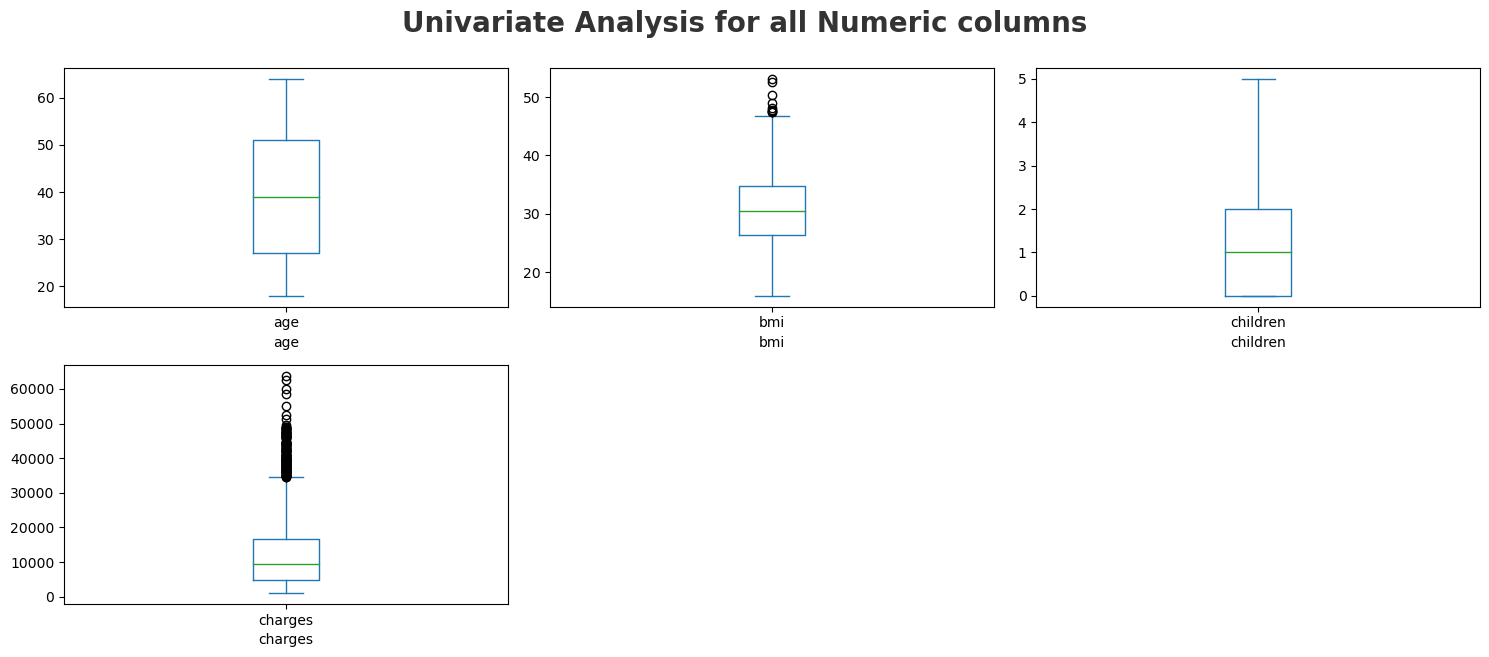

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    healthcare_df[numerical_features[i]].plot(kind="box")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observation:
- As we expected we don't find any outliers in the age.
- The absence of outliers in the age column provides confidence in the data quality, facilitates more accurate analysis.
- This feature has outliers. May be the patients with high bmi are fit and healthy or may be they are athlets with healthy condition those who has less medical expences with high bmi.
- This graph idcates that it is normally distributed. And also we can Indentify symmetricity in the bell shaped curve.
- Charges is the target variable, so we didn't remove the outliers.

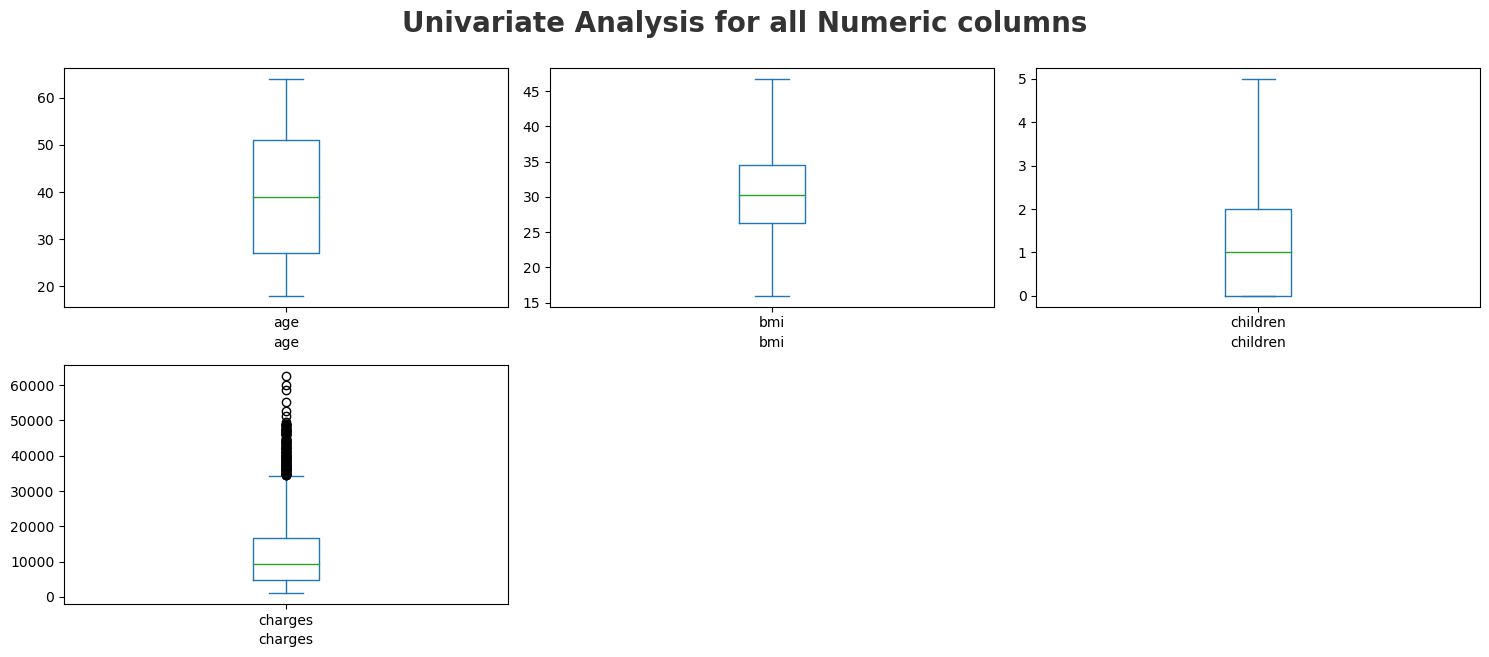

In [15]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    cleaned_healthcare_df[numerical_features[i]].plot(kind="box")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observation:
- No outliers found in bmi after treating the outliers by 1.5 IQR.

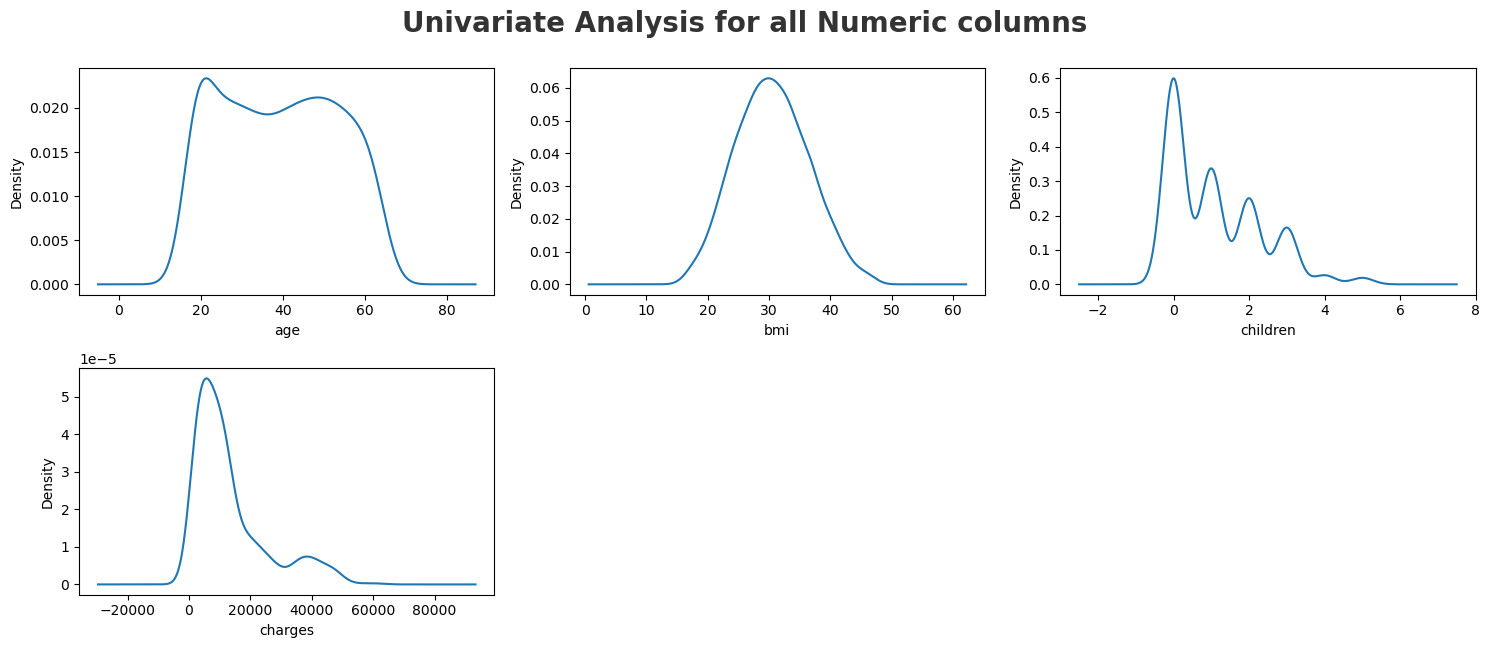

In [16]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    cleaned_healthcare_df[numerical_features[i]].plot(kind="kde")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observation:
- we can see that every age group has almost same distribution. But it is not normally distributed. It's almost looking symmetric but having some discrepencies in the peek of the bell shaped curve.
- This curve is looking almost symmetric.
- The distribution might be normally distribted.
- This distribution has 4 modes , so children feature has multimodel distribution.
-  By seeing this graph we can say that  this feature has pareto distribution. To move this graph to right we can use Boxcox Transformation.


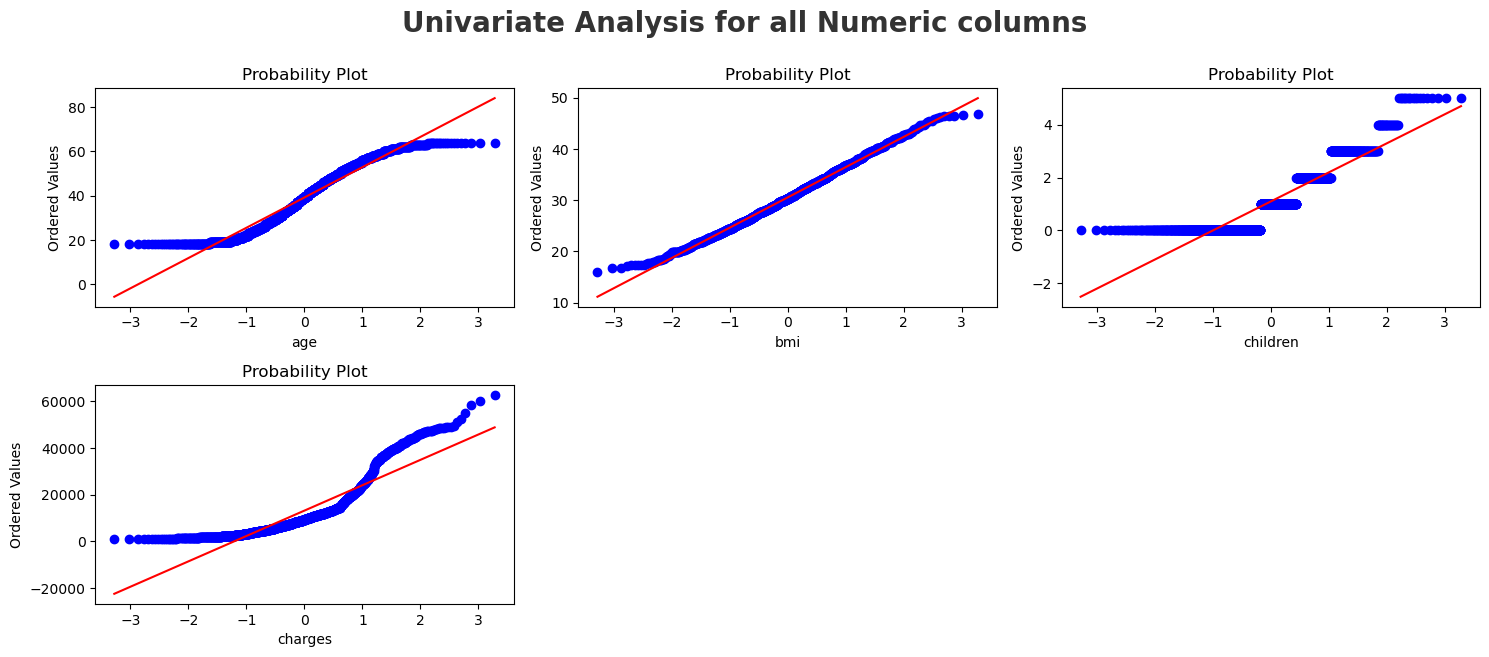

In [17]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    stats.probplot(cleaned_healthcare_df[numerical_features[i]],dist="norm",plot=plt)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observation:
- Most of the data points are not lie on the line. So it is not normally distributed.
- This signifies that bmi feature is almost normally distributed except few points.
- As above mentioned it is not normally distributed and It is pareto distribution.

# Categorical columns



### Univariate Analysis on sex feature

In [18]:

### Non Vizual Analysiss on Sex feature
cleaned_healthcare_df["sex"].value_counts(normalize=True)

male      0.504138
female    0.495862
Name: sex, dtype: float64

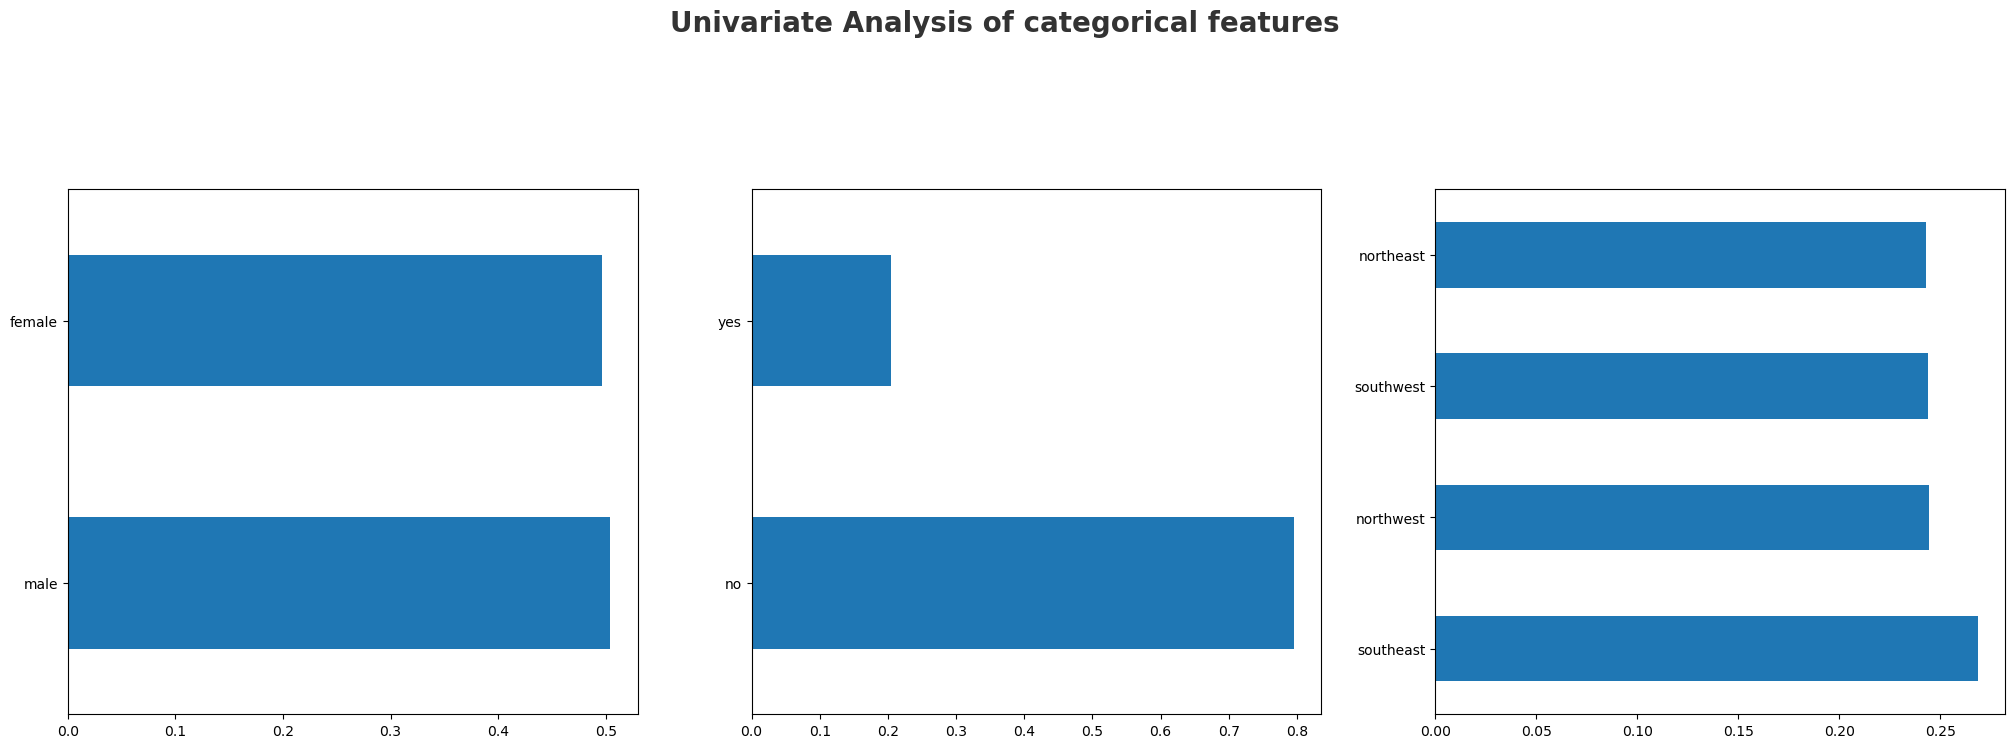

In [19]:
### Vizual Analysis on sex feature using bar plot

plt.figure(figsize=(25,15))
plt.suptitle("Univariate Analysis of categorical features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ["sex", "smoker", "region"]

for i in range(len(cat1)):
    plt.subplot(2, 3, i+1)
    cleaned_healthcare_df[cat1[i]].value_counts(normalize=True).plot(kind="barh")
    

### Observation:
- Almost male and female persons are having same medical expences.
- Count Non smokers are more who have medical expence than count of smokers who have medical expences.
- Count of Southeast region People are more who have the medical Expences than the other three regions.
- Count of people from northeast, southwest,northwest Regions are almost eaqual those who have medical expences.

## Numerical vs Numerical
### Bivariate Analysis on "age" and "charges"

In [20]:
### Nonvizual Analysis on Numerical columns

cleaned_healthcare_df[["age", "bmi", "children", "charges"]].corr()


,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


### Observation:
- age and charges are having positive relation relation.
- Positive correlation: If the correlation value is close to 1, it indicates a strong positive correlation. Here "age" and "charges" have a correlation value of 0.522, indicating a moderate positive correlation. "bmi" and "charges" have a correlation 0.136 , indicating moderate positive correlation.
- No correlation: If the correlation value is close to 0, it suggests no linear relationship between the two features. The "children" and "bmi" have a correlation value of 0.017, indicating no significant correlation.

<AxesSubplot:xlabel='age', ylabel='charges'>

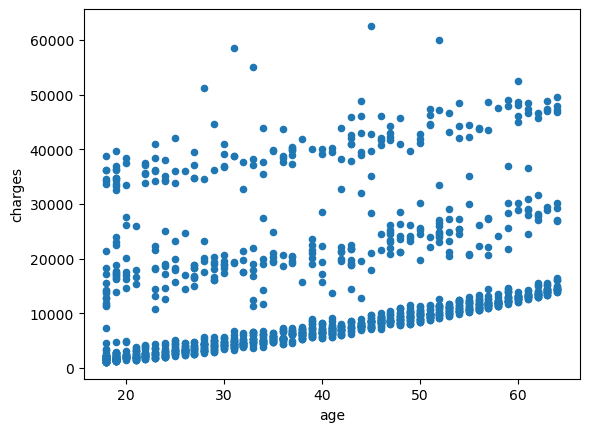

In [21]:
## Vizual Analysis on age And Charges
cleaned_healthcare_df.plot(kind="scatter",x="age",y="charges")

### Observation:
- ### "age" and "charges" features have positive relation ship.
- ### As age is increasing Medical expences also increasing. And also Those who have less age also have the medical expences. they might be with higher bmi or smokers.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

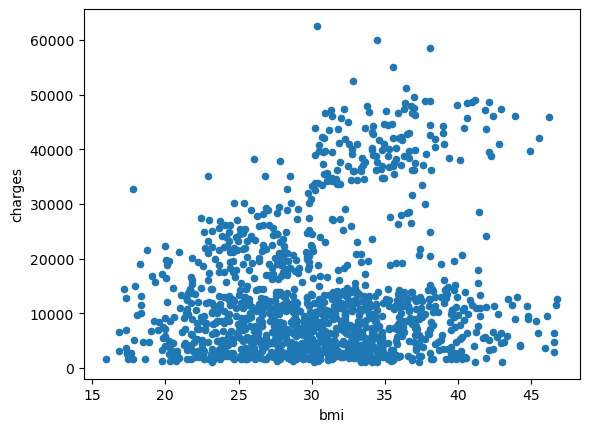

In [22]:
## Vizual Analysis on age And Charges
cleaned_healthcare_df.plot(kind="scatter",x="bmi",y="charges")

### Observation
- ### Bmi has increased the medical expences are also increased in the ranges from 20 to 45.
- ### If Bmi is high and medical expences are less for the patients might be athlets who has fit health condition with that bmi.

## Numerical Vs Categorical

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

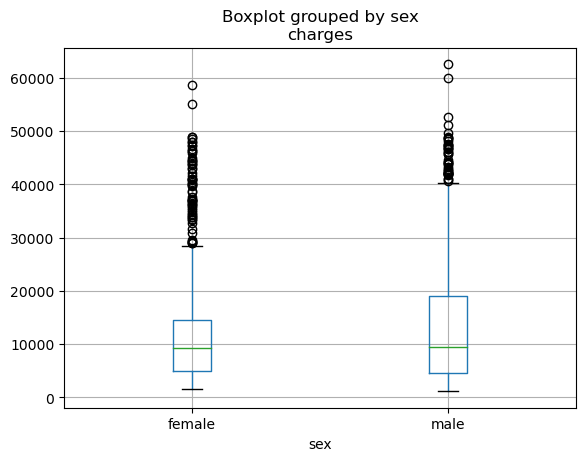

In [23]:
# Visual Analysis on sex Vs charges
cleaned_healthcare_df.boxplot(by="sex",column="charges")

### Observation:
- we can compare the minimum and maximum charges of male and females and the number of oultiers which are high in females when     compared to males  which indicates that the medical costs of  few females is high compared to other females and finally the     medical expenses of females is higher compared to the medical expenses of males

- They can Introduce new strategies to fix premium for female members of health insurance.



### Bivariate Analysis on smoker  Vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

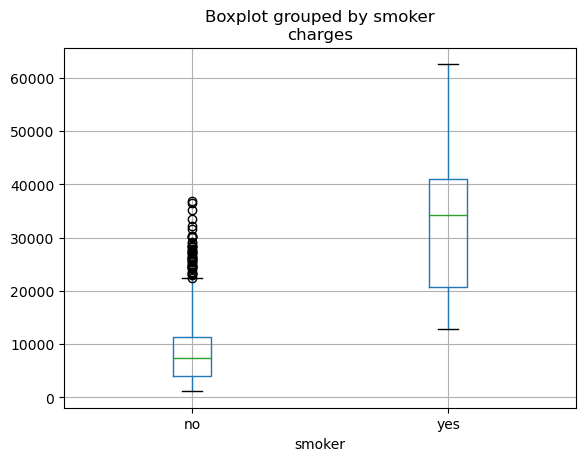

In [24]:
## Vizual Analysis on smoker vs charges features

cleaned_healthcare_df.boxplot(by="smoker",column="charges")

### Outliers:
- If we compare the minimum and maximum values of smoker and non smokers, the minimum value of the smoker is starting at almost closer to the maximum value of non smokers. By this we can estimate that smokers will have the more medical expencess that the non smokers.
- Even though the non smokers have outliere their medical charges are not that expencive comapartive to smoker expences.
- Smokers tend to have basic medical expences that are so expencive than 3/4th of non smokers never incur such expenditure.



### Bivariate on region Vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

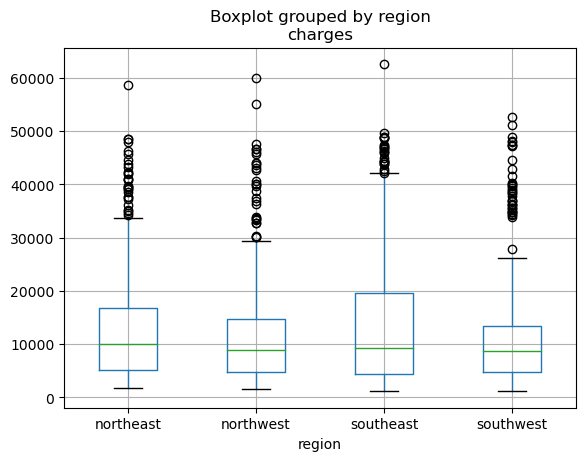

In [25]:
## Vizual Analysis on region and charges.
cleaned_healthcare_df.boxplot(by="region",column="charges")

### Observations:
- South east patients are spending more amount comparative to other three regions. If we observe the outliers also the medical expence of southeast region are very high.


### Categorical Vs Categorical

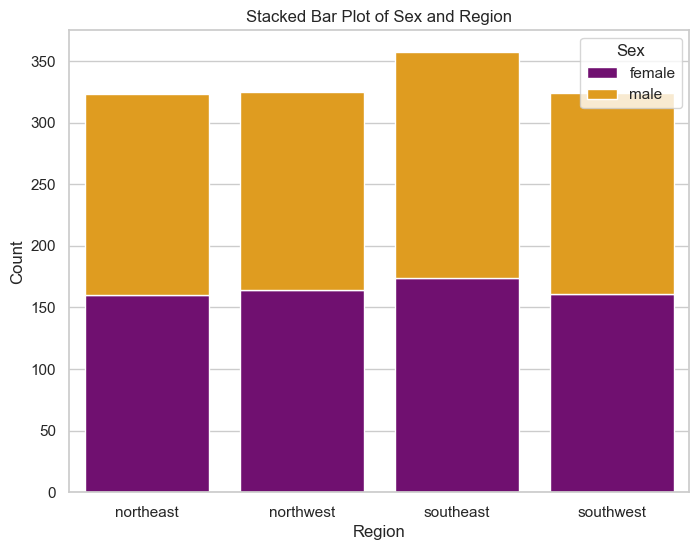

In [26]:
## Analysing the relation ship between gender and region
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of sex and region categories
cross_tab = pd.crosstab(cleaned_healthcare_df['region'], cleaned_healthcare_df['sex'])

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['female'], color='purple', label='female')
sns.barplot(x=cross_tab.index, y=cross_tab['male'], bottom=cross_tab['female'], color='orange', label='male')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Sex and Region')

# Add a legend
plt.legend(title='Sex')

# Show the plot
plt.show()


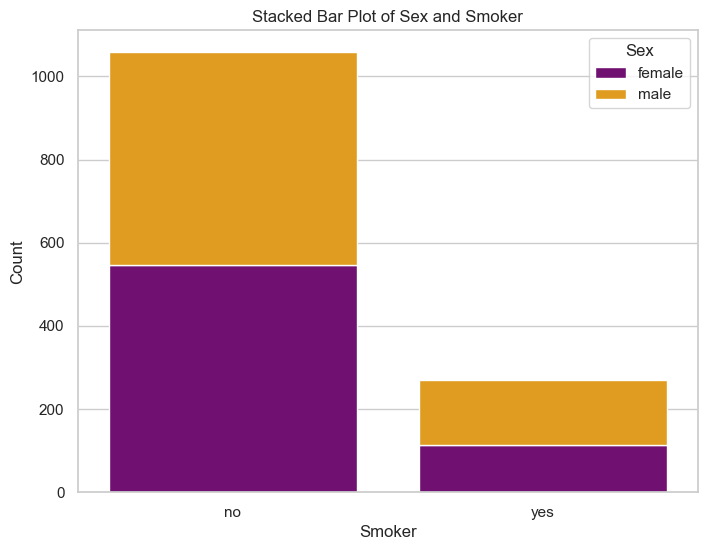

In [27]:
## Analysing the relation ship between gender and region
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of sex and region categories
cross_tab = pd.crosstab(cleaned_healthcare_df['smoker'], cleaned_healthcare_df['sex'])

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['female'], color='purple', label='female')
sns.barplot(x=cross_tab.index, y=cross_tab['male'], bottom=cross_tab['female'], color='orange', label='male')

# Set labels and title
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Sex and Smoker')

# Add a legend
plt.legend(title='Sex')

# Show the plot
plt.show()

### By observing this graph the female patient who are with higher risk are from south east region compare toother regions.

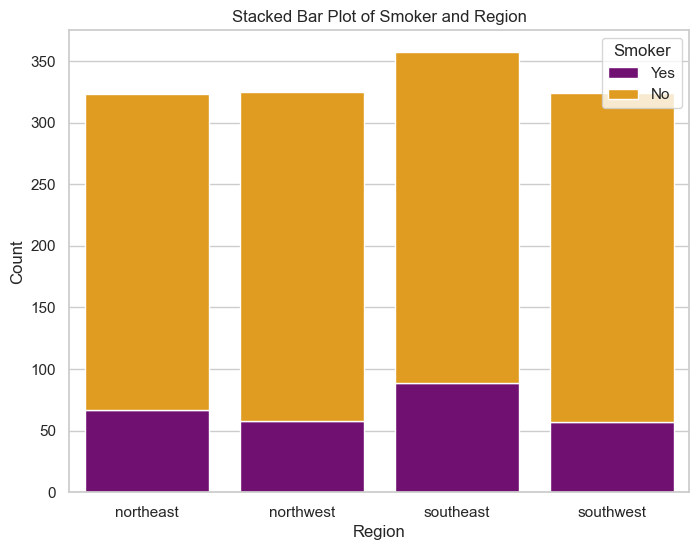

In [28]:
## Analysing the relation ship between smoker and region
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of sex and region categories
cross_tab = pd.crosstab(cleaned_healthcare_df['region'], cleaned_healthcare_df['smoker'])

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cross_tab.index, y=cross_tab['yes'], color='purple', label='Yes')
sns.barplot(x=cross_tab.index, y=cross_tab['no'], bottom=cross_tab['yes'], color='orange', label='No')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Smoker and Region')

# Add a legend
plt.legend(title='Smoker')

# Show the plot
plt.show()


### smokers are less in count in every region but in that count also highest count is from southeast.

### Multivariate Analysis

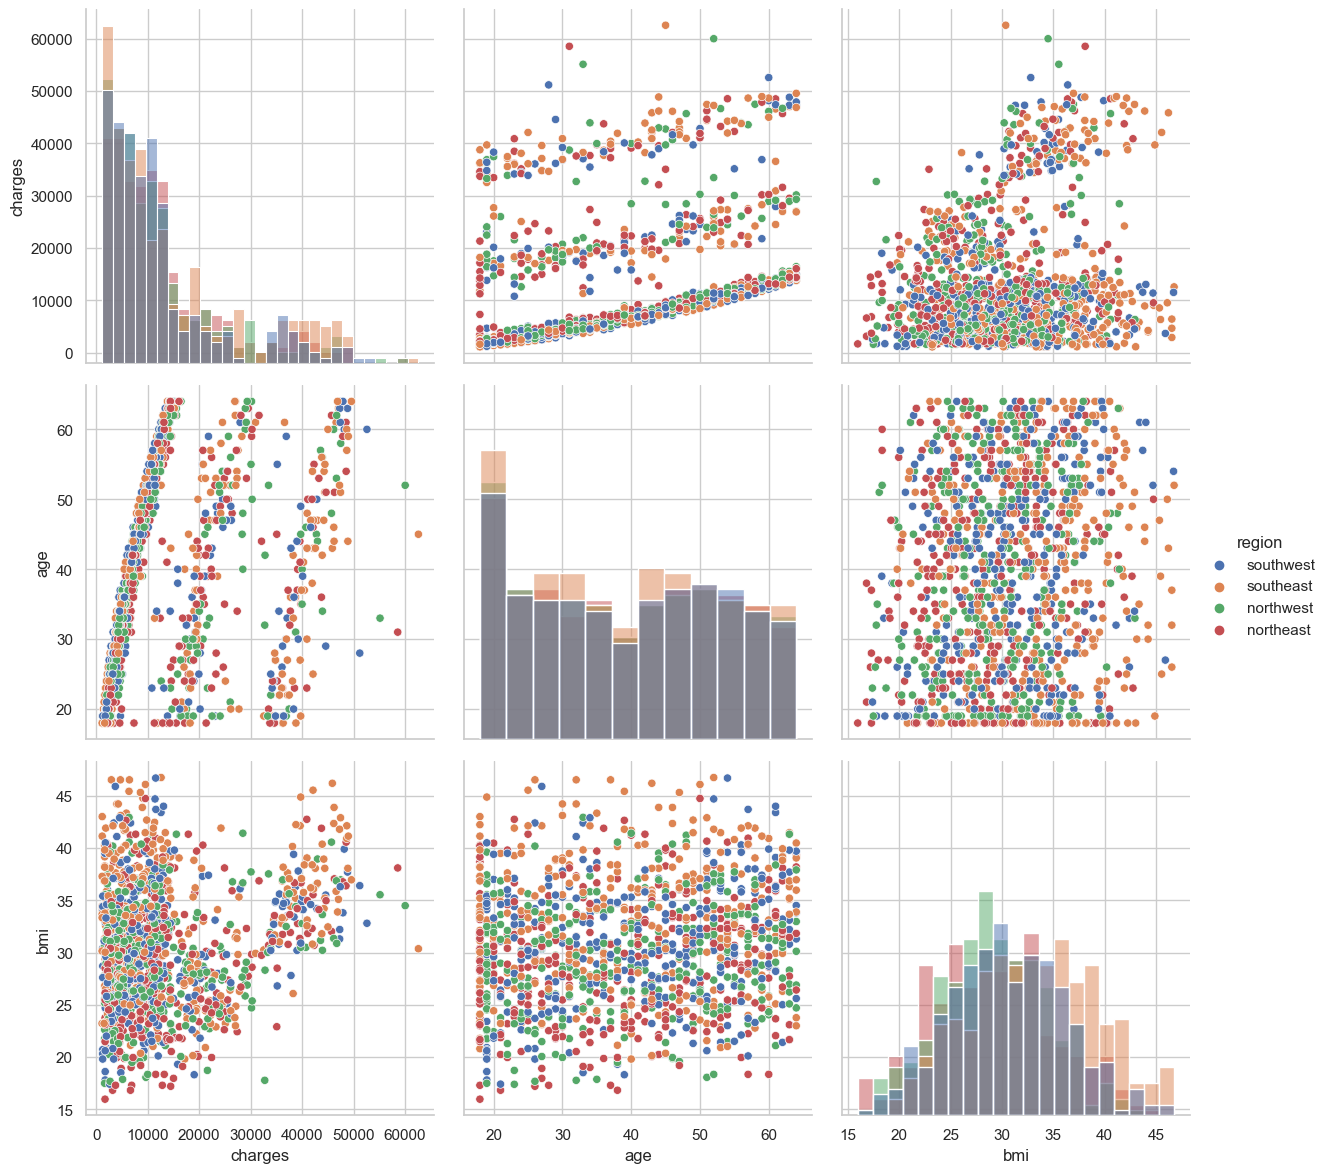

In [29]:
### Analysing the interr relation ship between age,bmi,charges and region.
g = sns.PairGrid(cleaned_healthcare_df, vars=["charges", "age", "bmi"], hue="region", height=4)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()
plt.show()

### We can observe very strong relation beteween age and bmi and also the high age with high bmi people are from southeast region. It indicates that south east region patients have more medical expences.


<AxesSubplot:>

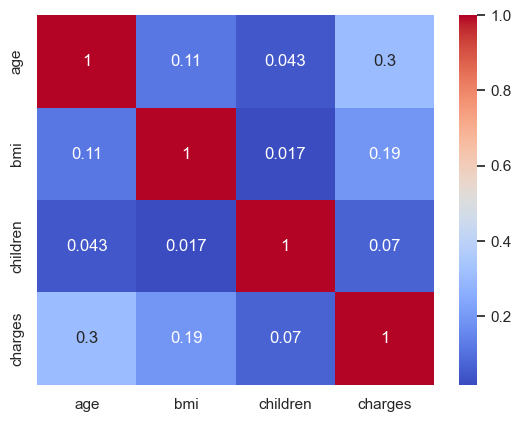

In [30]:
 # calculate the correlation matrix between numerical features
numerical_columns = [feature for feature in cleaned_healthcare_df.columns if cleaned_healthcare_df[feature].dtype !="O"]
 # feature = st.selectbox("Swlwct a feature",("emi","price","year","kilometers","mileage"))
corr_matrix = cleaned_healthcare_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Oservation:
- All the features have the postive relation but age has more strong realtion with charges comparative other features.

### Data Preprocessing

### Step 1:Identifying Input And Target Variable
- Input Variables - age,bmi,smoker,sex,region. 
- Targett/Output Variable - charges.
- Since charges is continuous in nature Type of ML task is **Regression Task**.    
- The Evaluation Metrics is **Mean Absolute Error**.

In [31]:
### a.Identifying Input varriables and Target Variable
y = cleaned_healthcare_df["charges"]
X = cleaned_healthcare_df[["age","bmi","smoker","sex","region"]]


In [32]:
cleaned_healthcare_df.shape

(1329, 7)

### Step 2 : Split the dataset into Training and Testing (recommended 75:25 split).

In [33]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=40)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(996, 5) (996,)
(333, 5) (333,)


In [35]:
X_train.dtypes

age         int64
bmi       float64
smoker     object
sex        object
region     object
dtype: object

### Separating Categorical and numerical features

In [36]:
X_train_cat = X_train.select_dtypes(include="object")
X_train_cat.head()

,smoker,sex,region
1006,no,male,northeast
1058,no,female,southeast
1191,no,female,northeast
864,no,male,southwest
1085,yes,female,southwest


In [37]:
X_train_num = X_train.select_dtypes(include=["int64","float64"])
X_train_num.head()

,age,bmi
1006,28,29.260
1058,24,39.490
1191,41,21.755
864,51,25.400
1085,39,18.300


### Scaling Numerical features

In [38]:
### sclaling for numerrical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                      columns=X_train_num.columns,
                                      index=X_train_num.index)
# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed.head()

,age,bmi
1006,-0.808290,-0.224184
1058,-1.092537,1.498573
1191,0.115511,-1.488045
864,0.826127,-0.874218
1085,-0.026612,-2.069875


In [39]:

X_train_num.describe()

,age,bmi
count,996.000000,996.000000
mean,39.374498,30.591240
std,14.079363,5.941139
min,18.000000,15.960000
25%,27.000000,26.272500
50%,39.000000,30.447500
75%,51.000000,34.618750
max,64.000000,46.700000


In [40]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 2
Mean of each column: [39.37449799 30.59123996]
Std of each column: [14.07229299  5.93815537]


### Separate nominal and ordinal categorical columns


In [41]:
X_train_cat["sex"].unique()

array(['male', 'female'], dtype=object)

In [42]:
X_train_cat["smoker"].unique()

array(['no', 'yes'], dtype=object)

In [43]:
X_train_cat["region"].unique()

array(['northeast', 'southeast', 'southwest', 'northwest'], dtype=object)

In [44]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
1006,0.0,1.0,0.0,0.0,0.0
1058,0.0,0.0,0.0,1.0,0.0
1191,0.0,0.0,0.0,0.0,0.0
864,0.0,1.0,0.0,0.0,1.0
1085,1.0,0.0,0.0,0.0,1.0


In [45]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,age,bmi,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
1006,-0.808290,-0.224184,0.0,1.0,0.0,0.0,0.0
1058,-1.092537,1.498573,0.0,0.0,0.0,1.0,0.0
1191,0.115511,-1.488045,0.0,0.0,0.0,0.0,0.0
864,0.826127,-0.874218,0.0,1.0,0.0,0.0,1.0
1085,-0.026612,-2.069875,1.0,0.0,0.0,0.0,1.0


### Data Preparation on test data


In [46]:
### Separating categorical and Numerical features
X_test_cat = X_test.select_dtypes(include="object")
X_test_cat.head()

,smoker,sex,region
1175,no,female,southwest
56,no,female,northeast
457,no,female,northwest
85,yes,male,northwest
79,no,female,northwest


In [47]:
X_test_num = X_test.select_dtypes(include=["int64","float64"])
X_test_num.head()

,age,bmi
1175,22,27.100
56,58,31.825
457,57,30.495
85,45,22.895
79,41,32.965


In [48]:
## rescaling the test data
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),
                                                       columns = X_test_num.columns, 
                                   index = X_test_num.index)
X_test_num_transformed.head()

,age,bmi
1175,-1.234660,-0.587933
56,1.323558,0.207768
457,1.252497,-0.016207
85,0.399757,-1.296066
79,0.115511,0.399747


In [49]:
## Applying one-hot encoding on Test data
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                            columns=encoder.get_feature_names_out(X_train_cat.columns),
                             index=X_test_cat.index)
X_test_cat_ohe.head()

,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
1175,0.0,0.0,0.0,0.0,1.0
56,0.0,0.0,0.0,0.0,0.0
457,0.0,0.0,1.0,0.0,0.0
85,1.0,1.0,1.0,0.0,0.0
79,0.0,0.0,1.0,0.0,0.0


In [50]:
## combining two test transformed data frames
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,age,bmi,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
1175,-1.234660,-0.587933,0.0,0.0,0.0,0.0,1.0
56,1.323558,0.207768,0.0,0.0,0.0,0.0,0.0
457,1.252497,-0.016207,0.0,0.0,1.0,0.0,0.0
85,0.399757,-1.296066,1.0,1.0,1.0,0.0,0.0
79,0.115511,0.399747,0.0,0.0,1.0,0.0,0.0


### LinearRegression

In [51]:
### build the model on Trained transformed data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [52]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [53]:
temp_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head()

,Actual,Predicted
1175,2154.36100,2332.116621
56,13607.36875,14857.822237
457,11840.77505,13450.849610
85,21098.55405,31063.841637
79,6571.02435,10161.936932


<AxesSubplot:xlabel='charges', ylabel='Count'>

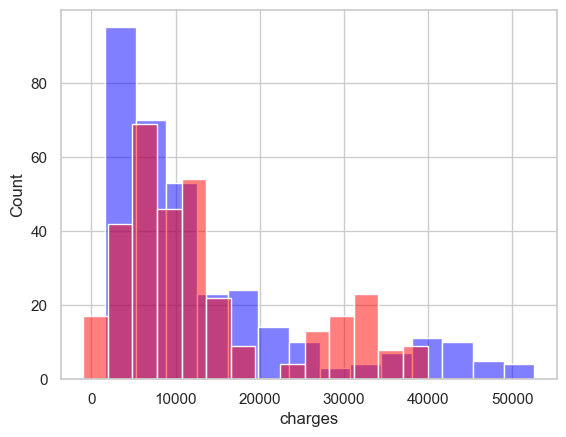

In [54]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [55]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4235.390736312288
Mean Squared Error:  34519517.038667925
Root Mean Squared Error:  5875.33122799625


### KNN Regression

In [56]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [57]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [58]:
temp_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head()

,Actual,Predicted
1175,2154.36100,5918.618834
56,13607.36875,13392.527770
457,11840.77505,13027.589910
85,21098.55405,26232.108594
79,6571.02435,7894.989190


<AxesSubplot:xlabel='charges', ylabel='Count'>

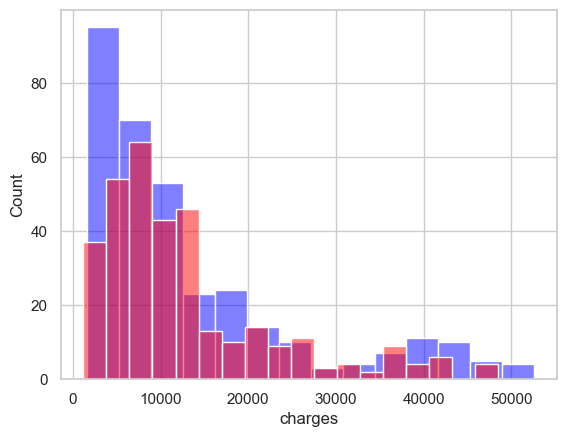

In [59]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [60]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3350.2558841135133
Mean Squared Error:  28274542.82104976
Root Mean Squared Error:  5317.381199523856


### Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [62]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [63]:
temp_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head()

,Actual,Predicted
1175,2154.36100,22493.65964
56,13607.36875,11938.25595
457,11840.77505,11842.62375
85,21098.55405,35069.37452
79,6571.02435,7050.02130


<AxesSubplot:xlabel='charges', ylabel='Count'>

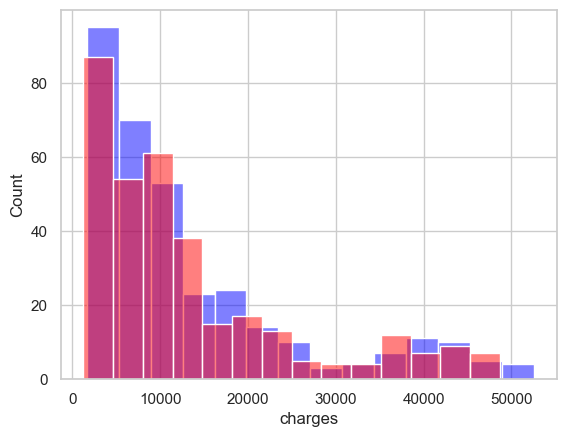

In [64]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [65]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2625.726654504505
Mean Squared Error:  29050304.921910834
Root Mean Squared Error:  5389.833478124425


### Support Vector Regression

In [66]:
from sklearn.svm import SVR 
regressor =SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [67]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [68]:
temp_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head()

,Actual,Predicted
1175,2154.36100,9245.500316
56,13607.36875,9429.926238
457,11840.77505,9415.400130
85,21098.55405,9360.696817
79,6571.02435,9323.640565


<AxesSubplot:xlabel='charges', ylabel='Count'>

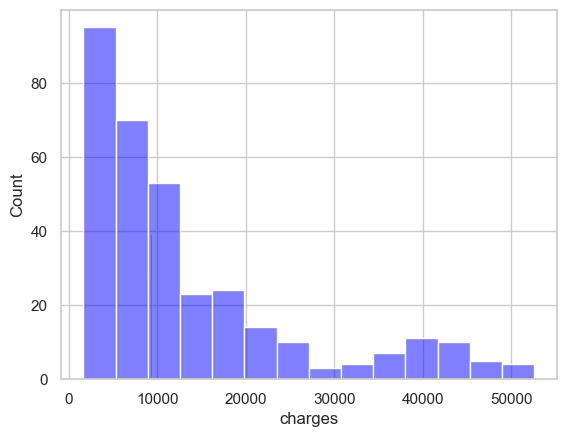

In [69]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [70]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  8520.815929522349
Mean Squared Error:  165865687.5434746
Root Mean Squared Error:  12878.885337771846


### Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [72]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
temp_df.head()

,Actual,Predicted
1175,2154.36100,6581.406992
56,13607.36875,13027.309140
457,11840.77505,12241.494036
85,21098.55405,30077.094083
79,6571.02435,7627.887470


<AxesSubplot:xlabel='charges', ylabel='Count'>

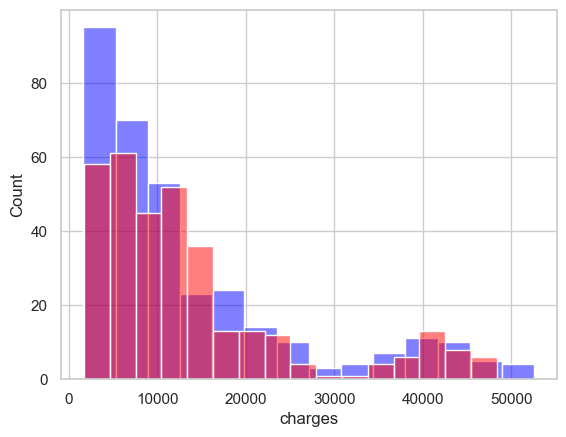

In [74]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [75]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2606.9429805779932
Mean Squared Error:  19044741.729278736
Root Mean Squared Error:  4364.0281540428605


### Comparative all other models Random Forest Regressor Model is the best model.